### _Abstracto_

*   Este proyecto busca desarrollar un modelo de Machine Learning para predecir el valor de mercado de jugadores de fútbol utilizando características como edad, altura, apariciones, goles y asistencias. La predicción ayudará a equipos y analistas a tomar decisiones informadas en el mercado de transferencias. Se evaluarán varios modelos para identificar el más preciso y eficiente.

### Problema

*   El objetivo de este proyecto es predecir el valor de mercado de un jugador de fútbol utilizando un modelo de Machine Learning. Se analizarán variables como la edad, altura, cantidad de apariciones, goles y asistencias para estimar el valor monetario del jugador. Esta predicción permitirá a clubes y agentes tomar decisiones informadas en el mercado de transferencias.

### Análisis Exploratorio de Datos (EDA)

In [107]:
#importacion de librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [108]:
# Cargar los datos
df=pd.read_csv("./data.csv")
df.head(2)

,Equipo,Nombre,Posicion,Altura,Edad,Apariciones,Goles,Asistencias,Tarjetas Amarillas,2da Tarjeta Amarillas,...,Goles Concedidos,Valla Invicta,Minutos Jugados,Dias De baja por Lesion,Partidos Perdidos por Lesion,Premios,Valor Actual,Valor Maximo,Posicion Numero,Extremo
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


In [109]:
# Descripción estadística del dataset

# Información general del dataframe
print("Información general del dataframe:")
df.info()

Información general del dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Equipo                        10754 non-null  object 
 1   Nombre                        10754 non-null  object 
 2   Posicion                      10754 non-null  object 
 3   Altura                        10754 non-null  float64
 4   Edad                          10754 non-null  float64
 5   Apariciones                   10754 non-null  int64  
 6   Goles                         10754 non-null  float64
 7   Asistencias                   10754 non-null  float64
 8   Tarjetas Amarillas            10754 non-null  float64
 9   2da Tarjeta Amarillas         10754 non-null  float64
 10  Tarjetas Rojas                10754 non-null  float64
 11  Goles Concedidos              10754 non-null  float64
 12  Valla Invicta            

In [110]:
# Descripción estadística básica del dataframe
print("\nDescripción estadística básica del dataframe:")
df.describe()



Descripción estadística básica del dataframe:


,Altura,Edad,Apariciones,Goles,Asistencias,Tarjetas Amarillas,2da Tarjeta Amarillas,Tarjetas Rojas,Goles Concedidos,Valla Invicta,Minutos Jugados,Dias De baja por Lesion,Partidos Perdidos por Lesion,Premios,Valor Actual,Valor Maximo,Posicion Numero,Extremo
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [111]:
#Valores faltantes
print("\nRevisión de valores faltantes en cada columna:")
df.isnull().sum()



Revisión de valores faltantes en cada columna:


Equipo                          0
Nombre                          0
Posicion                        0
Altura                          0
Edad                            0
Apariciones                     0
Goles                           0
Asistencias                     0
Tarjetas Amarillas              0
2da Tarjeta Amarillas           0
Tarjetas Rojas                  0
Goles Concedidos                0
Valla Invicta                   0
Minutos Jugados                 0
Dias De baja por Lesion         0
Partidos Perdidos por Lesion    0
Premios                         0
Valor Actual                    0
Valor Maximo                    0
Posicion Numero                 0
Extremo                         0
dtype: int64

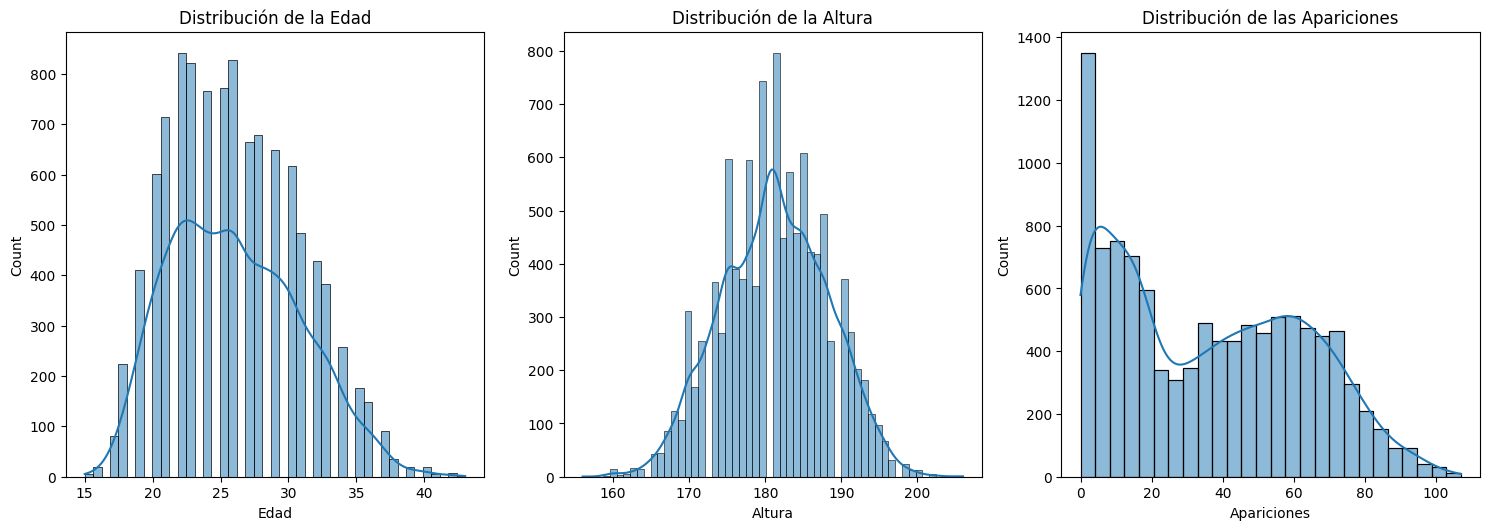

In [112]:
# Visualización de la distribución de las variables clave
plt.figure(figsize=(15, 10))


#Distribucion de la Edad
plt.subplot(2, 3, 1)
sns.histplot(df['Edad'], kde=True)
plt.title('Distribución de la Edad')

#Distribucion de la altura
plt.subplot(2, 3, 2)
sns.histplot(df['Altura'], kde=True)
plt.title('Distribución de la Altura')


#Cantidad de Apariciones
plt.subplot(2, 3, 3)
sns.histplot(df['Apariciones'], kde=True)
plt.title('Distribución de las Apariciones')


plt.tight_layout()
plt.show()


In [113]:
# funcion para crear histograma
def grafico_histograma(df, columna, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    sns.histplot(df[columna], bins=15, kde=True)
    plt.title(f'Distribución de {columna}')
    plt.xlabel(columna)
    plt.ylabel(f'Frecuencia de {columna}')
    plt.show()

# funcion para crear boxplot
def grafico_boxplot(df, columna, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    sns.boxplot(x=df[columna])
    plt.title(f'Boxplot de {columna}')
    plt.xlabel(columna)
    plt.show()

# funcion para crear graficos de Quartiles   
def grafico_cuartiles(df, columna,figsize=(10, 6)):
    # Calcular los cuartiles
    quartiles = df[columna].quantile([0.25, 0.5, 0.75])

    # Crear el gráfico de barras para los cuartiles
    plt.bar(['Q1', 'Q2 (Mediana)', 'Q3'], quartiles.values, color=['red', 'green', 'blue'])
    plt.title(f'Cuartiles para {columna}')
    plt.xlabel('Cuartiles')
    plt.ylabel(columna)
    plt.show()

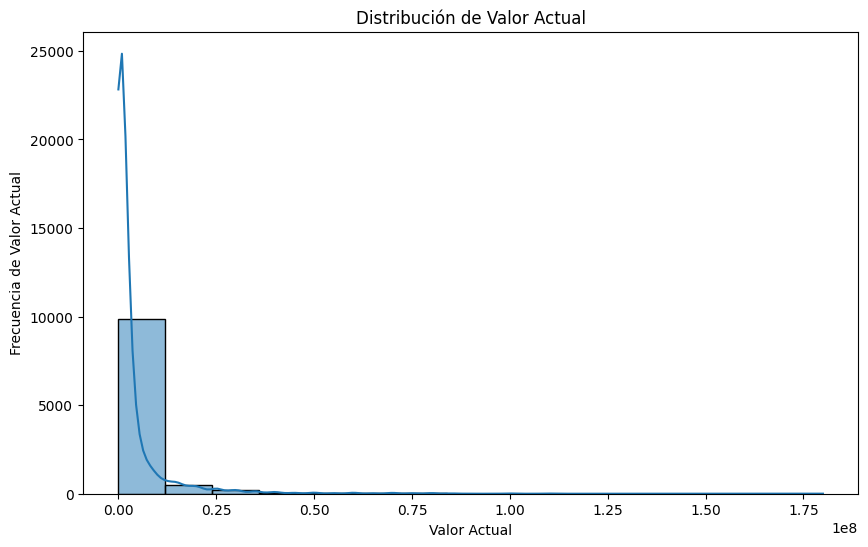

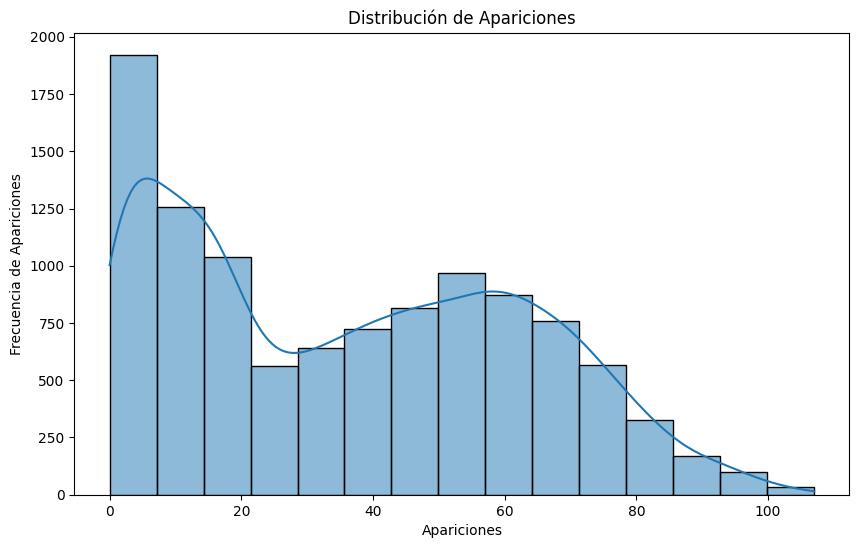

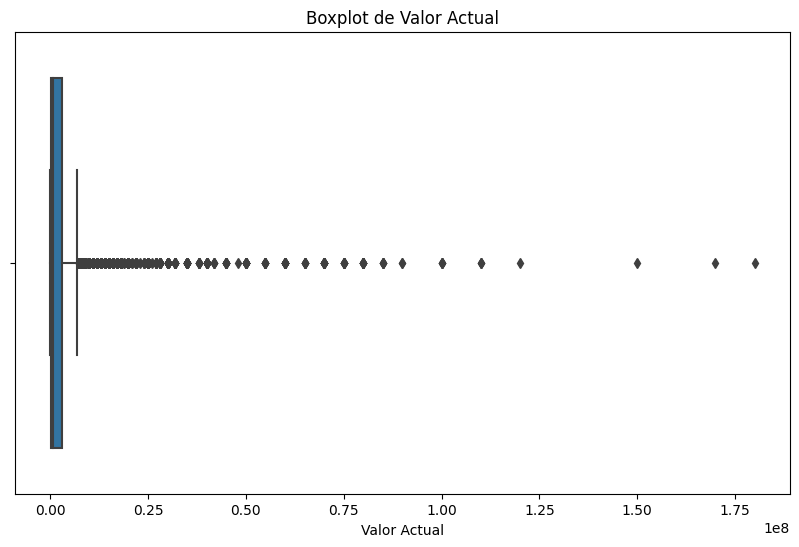

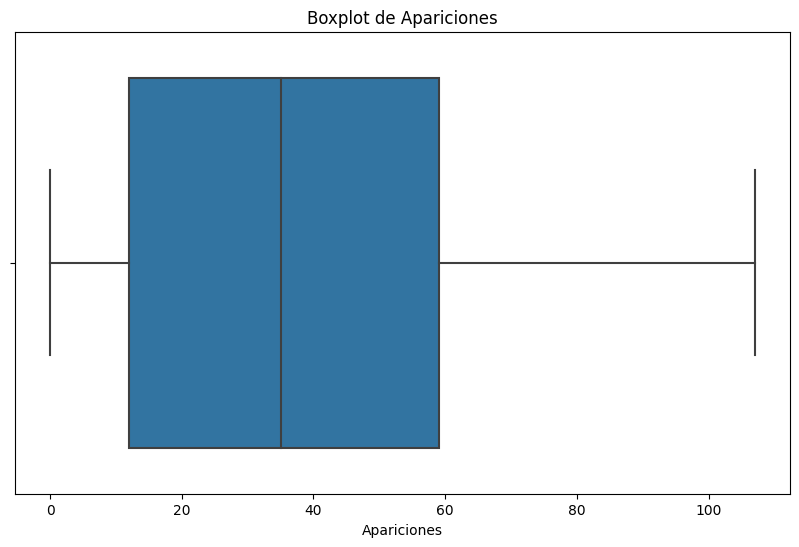

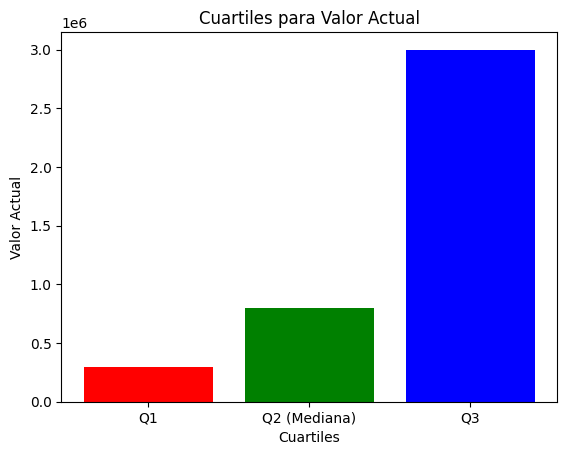

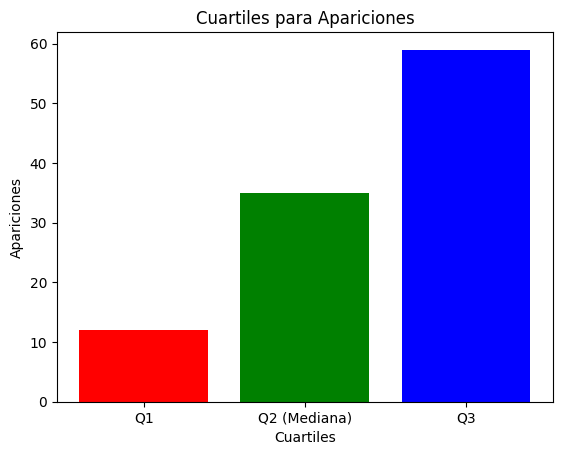

In [114]:
# creacion de graficos pasando parametros
grafico_histograma(df, 'Valor Actual')
grafico_histograma(df, 'Apariciones')

grafico_boxplot(df, 'Valor Actual')
grafico_boxplot(df, 'Apariciones')


grafico_cuartiles(df, 'Valor Actual')
grafico_cuartiles(df, 'Apariciones')

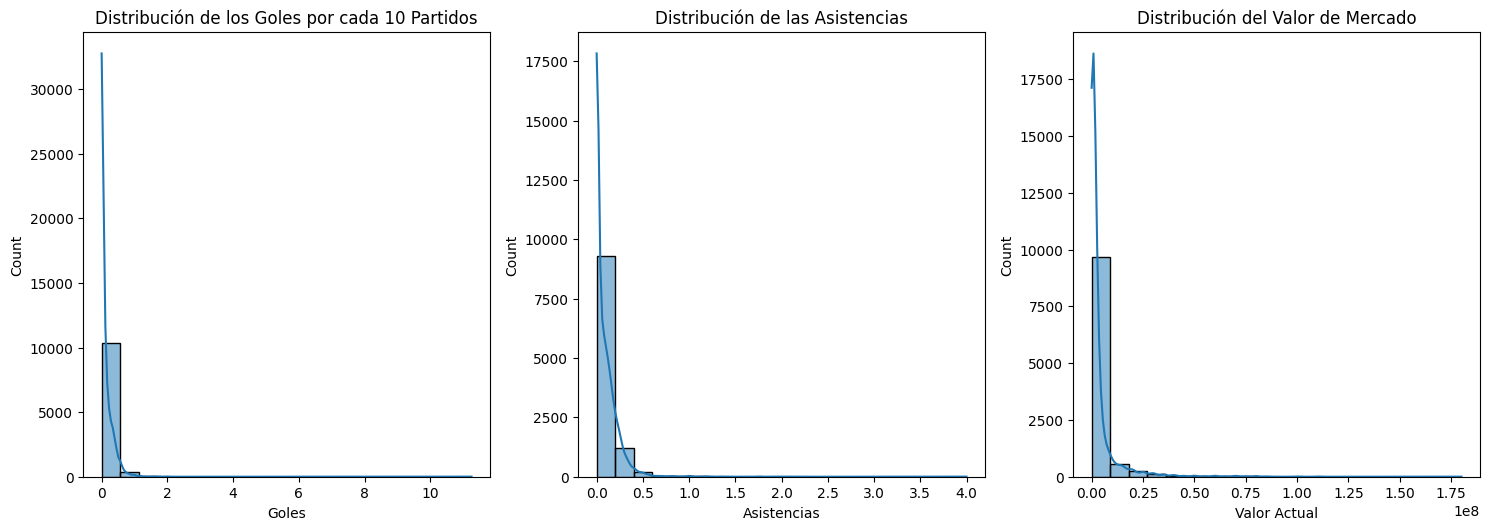

In [99]:
plt.figure(figsize=(15, 10))

# Gráfico de barras para los Goles por cada 10 partidos
plt.subplot(2, 3, 4)
sns.histplot(df['Goles'], kde=True, bins=20)
plt.title('Distribución de los Goles por cada 10 Partidos')

# Gráfico de barras para las Asistencias
plt.subplot(2, 3, 5)
sns.histplot(df['Asistencias'], kde=True, bins=20)
plt.title('Distribución de las Asistencias')

# Gráfico de barras para el Valor de Mercado
plt.subplot(2, 3, 6)
sns.histplot(df['Valor Actual'], kde=True, bins=20)
plt.title('Distribución del Valor de Mercado')

plt.tight_layout()
plt.show()

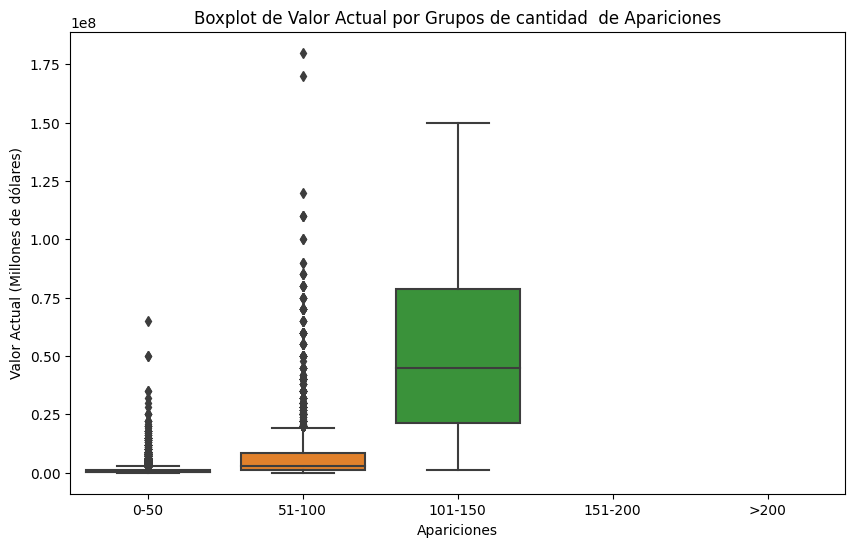

In [117]:
# Definir los límites y etiquetas de los grupos
bins_apariciones = [0, 50, 100, 150, 200, float('inf')]  
labels_apariciones = ['0-50', '51-100', '101-150', '151-200', '>200'] 

# Agrupar las apariciones en los grupos definidos
df['Apariciones_Categoria'] = pd.cut(df['Apariciones'], bins=bins_apariciones, labels=labels_apariciones)

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Apariciones_Categoria', y='Valor Actual', data=df)
plt.title('Boxplot de Valor Actual por Grupos de cantidad  de Apariciones')
plt.xlabel('Apariciones')
plt.ylabel('Valor Actual (Millones de dólares)')
plt.show()

### Ingeniería de Atributos

### Creación de Nuevas Variables:

In [118]:
# Crear una nueva variable de Goles por 10 Partidos
df['Goles por 10 Partidos'] = df['Goles'] * 10

#dejar posiciones y no subposiciones
df['Posicion']= df['Posicion'].str.extract(r'^\s*([^\s-]+)')

# Crear una nueva variable de Asistencias por 10 Partidos
df['Asistencias por 10 Partidos'] = df['Asistencias'] * 10

# Crear una nueva variable de Experiencia (Edad * Apariciones)
df['Experiencia'] = df['Edad'] * df['Apariciones']

# Ordenar por 'Goles por 10 Partidos' de mayor a menor
df_ordenado = df[['Posicion', 'Nombre', 'Goles por 10 Partidos', 'Asistencias por 10 Partidos']].sort_values(by='Goles por 10 Partidos', ascending=False)

# Mostrar las primeras 5 filas ordenadas
df_ordenado.head(5)

,Posicion,Nombre,Goles por 10 Partidos,Asistencias por 10 Partidos
9239,Attack,Rakan Al-Dosari,112.500000,0.0
3799,Attack,Júnior Moraes,60.000000,0.0
8547,Attack,Hidetaka Maie,45.000000,0.0
7596,Attack,José Sand,40.909091,0.0
8843,midfield,Hiroya Matsumoto,34.615385,0.0


### Transformación de Variables Existentes:

In [102]:
# StandardScaler para estandarizar las variables
scaler = StandardScaler()

# Estandarizar la variable Edad
df['Edad Estandarizada'] = scaler.fit_transform(df[['Edad']])

# Aplicar una transformación logarítmica al Valor Actual
df['Log Valor Actual'] = df['Valor Actual'].apply(lambda x: np.log(x + 1)) 

# Mostrar las primeras filas del dataframe con las nuevas columnas
df[['Edad', 'Edad Estandarizada', 'Valor Actual', 'Log Valor Actual']].head(2)

,Edad,Edad Estandarizada,Valor Actual,Log Valor Actual
0,32.0,1.247140,15000000,16.523561
1,30.0,0.828503,1500000,14.220976


###  Encoding de Variables Categóricas:

In [103]:
# Inicializar LabelEncoder
label_encoder = LabelEncoder()

# Aplicar Label Encoding a la columna 'Posicion'
df['Posición Codificada'] = label_encoder.fit_transform(df['Posicion'])

# Mostrar las primeras filas para ver la codificación
df[['Posicion', 'Posición Codificada']].head()

,Posicion,Posición Codificada
0,Goalkeeper,2
1,Goalkeeper,2
2,Goalkeeper,2
3,Defender,1
4,Defender,1


In [104]:
# Aplicar One-Hot Encoding a la columna 'Equipo'
df = pd.get_dummies(df, columns=['Equipo'], drop_first=True)

# Mostrar las primeras filas para ver la codificación
df.head()

,Nombre,Posicion,Altura,Edad,Apariciones,Goles,Asistencias,Tarjetas Amarillas,2da Tarjeta Amarillas,Tarjetas Rojas,...,Equipo_West Ham United,Equipo_Western Sydney Wanderers,Equipo_Western United FC,Equipo_Wigan Athletic,Equipo_Wolfsberger AC,Equipo_Wolverhampton Wanderers,Equipo_Yokohama F. Marinos,Equipo_Yokohama FC,Equipo_Zenit St. Petersburg,Equipo_Ümraniyespor
0,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,Lisandro Martínez,Defender,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,Raphaël Varane,Defender,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


### Entrenamiento y Testeo de Modelos

In [84]:
# Excluir columnas que no son numéricas o que no deben ser utilizadas en el modelo
X = df.drop(columns=['Valor Actual', 'Log Valor Actual', 'Nombre', 'Posicion'])
y = df['Log Valor Actual'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#modelos que utilizare
modelos = {
    'Regresión Lineal': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

resultados = {}
for nombre, modelo in modelos.items():
    scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = (-scores) ** 0.5
    print(f'{nombre} - RMSE de validación cruzada: {rmse_scores.mean():.4f}')
    
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    resultados[nombre] = {'MSE': mse, 'R2': r2, 'MAE': mae}
    print(f'{nombre} - MSE: {mse:.4f}, R²: {r2:.4f}, MAE: {mae:.4f}\n')

resultados_df = pd.DataFrame(resultados).T
print(resultados_df)

Regresión Lineal - RMSE de validación cruzada: 1.7243
Regresión Lineal - MSE: 3.5462, R²: 0.4307, MAE: 0.9948

Random Forest - RMSE de validación cruzada: 0.8682
Random Forest - MSE: 1.0065, R²: 0.8384, MAE: 0.3670

                       MSE        R2       MAE
Regresión Lineal  3.546172  0.430732  0.994767
Random Forest     1.006520  0.838423  0.366978


*   _El modelo Random Forest, tiene mejor rendimiento,  al modelo de Regresión Lineal, mostrando un MSE más bajo y un R² más alto, lo que indica una mejor capacidad para predecir el valor de los jugadores. Con un MAE más bajo, Random Forest también proporciona predicciones más precisas y menos error promedio. En conclusión, Random Forest es claramente el modelo más adecuado para esta tarea._

### _Optimización de Hiperparámetros para un Modelo de Random Forest_

In [105]:
# Definir los parámetros para probar y sus distribuciones (simplificados)
param_dist = {
    'n_estimators': [100, 150],  
    'max_depth': [None, 10, 15],   
    'min_samples_split': [2, 4],   
    'min_samples_leaf': [1, 2],   
    'bootstrap': [True]   
}

# Inicializar RandomizedSearchCV con menos iteraciones
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=5,  
                                   cv=3, 
                                   scoring='neg_mean_squared_error',
                                   n_jobs=-1,
                                   verbose=2,
                                   random_state=42)

# Ajustar el modelo
random_search.fit(X_train, y_train)

# Mostrar los mejores parámetros
print(f'Mejores parámetros encontrados por RandomizedSearchCV: {random_search.best_params_}')

# Evaluar el modelo optimizado en el conjunto de prueba
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)

print(f'Modelo Optimizado - MSE: {mse_best:.4f}, R²: {r2_best:.4f}, MAE: {mae_best:.4f}')

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Mejores parámetros encontrados por RandomizedSearchCV: {'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 15, 'bootstrap': True}
Modelo Optimizado - MSE: 1.0175, R²: 0.8367, MAE: 0.3749


* _El proceso de optimización de hiperparámetros para el modelo de Random Forest  identifico la mejor configuración con 100 árboles, una profundidad máxima de 15, y un mínimo de 4 muestras por división de nodo. El modelo optimizado alcanzó un MSE de 1.0175, lo que indica un bajo promedio de errores cuadrados en las predicciones. Además, el R² obtenido fue de 0.8367, lo que muestra que el modelo explica un 83.67% de la variabilidad en los datos. El MAE de 0.3749 revela que el error promedio absoluto es pequeño, lo que sugiere predicciones precisas y consistentes._

* _El modelo optimizado de Random Forest demuestra un excelente rendimiento al predecir el valor de mercado de los jugadores, con métricas que reflejan un buen ajuste y baja variabilidad en los errores. La combinación de un MSE bajo, un R² alto y un MAE reducido confirma que este modelo es adecuado y confiable para la tarea._

### _Visualizacion sobre Valores Reales / Valores Predecicos /Analisis del Error._

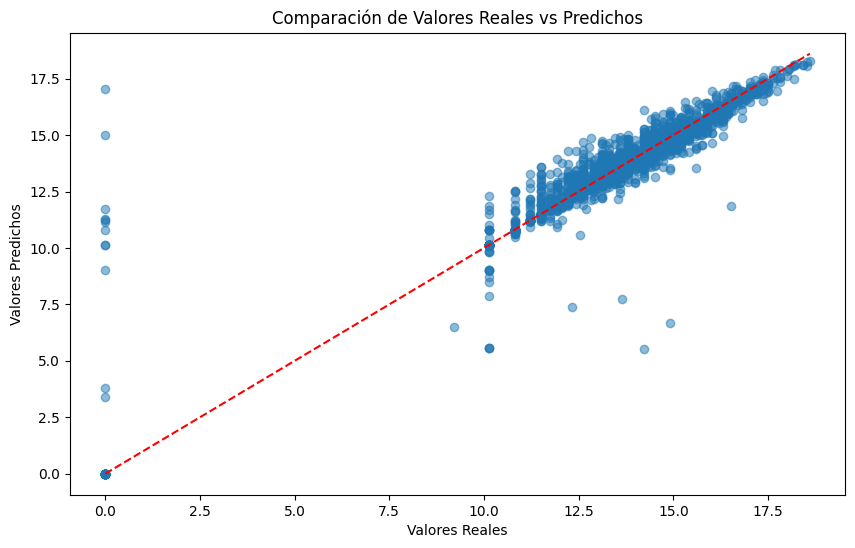

In [106]:
# Gráfico de dispersión de valores reales vs predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Comparación de Valores Reales vs Predichos')
plt.show()
